# Question 1

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import t

In [2]:
# Load data
df_1 = pd.read_csv('problem1.csv')
df_1.describe()

,x,y
count,100.000000,100.000000
mean,-0.140546,-0.022277
std,1.146820,0.948094
min,-2.928514,-1.869396
25%,-0.972205,-0.684961
50%,-0.057900,-0.023872
75%,0.425733,0.625466
max,3.049119,2.683855


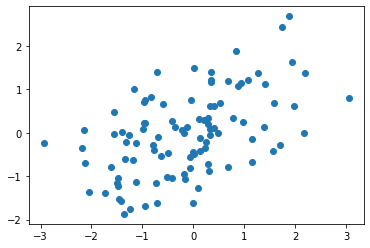

In [7]:
# Scatter plot visulization
plt.scatter(df_1.x,df_1.y)

In [12]:
# Multivariate Normal
y_mean = df_1.y.mean()
x_mean = df_1.x.mean()
cov = np.cov(df_1.y, df_1.x)

normal_beta_0 = cov[0,1]/cov[1,1]
normal_beta_1 = y_mean - (cov[0,1]/cov[1,1] * x_mean)

In [16]:
# OLS
X = sm.add_constant(df_1.x)
model_OLS = sm.OLS(df_1.y, X)
prediction_OLS = model_OLS.fit()

OLS_beta_0 = prediction_OLS.params[1]
OLS_beta_1 = prediction_OLS.params[0]

In [17]:
print("Multivariate Normal beta_0: ", normal_beta_0)
print("Multivariate Normal beta_1: ", normal_beta_1)

print("OLS beta_0: ", OLS_beta_0)
print("OLS beta_1: ", OLS_beta_1)

Multivariate Normal beta_0:  0.4280037050563171
Multivariate Normal beta_1:  0.037876861464547947
OLS beta_0:  0.4280037050563169
OLS beta_1:  0.03787686146454787


Conditional Distribution of multivariate normal gives the same result as OLS equation. 


# Question 2

In [3]:
# Load Data
df_2 = pd.read_csv('problem2.csv')

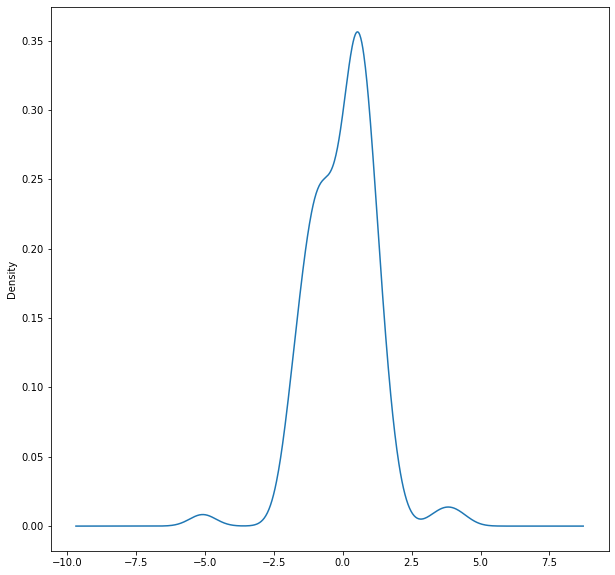

In [4]:
# OLS
X = sm.add_constant(df_2.x)
model_OLS = sm.OLS(df_2.y, X).fit()
prediction_OLS = model_OLS.predict(X)

plt.figure(figsize = (10,10))
error = df_2.y - prediction_OLS
OLS_dist = error.plot.kde(label = "Distribution of OLS")

In [5]:
def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*df_2.x

  LL = np.sum(stats.norm.logpdf(df_2.y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

In [6]:
model_mle = minimize(MLE_Norm, np.array([1,1,1]), method='L-BFGS-B')
model_mle

      fun: 159.99209669026132
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.13686838e-05, -3.58113537e-04,  1.87583283e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([0.11983604, 0.6051994 , 1.19839549])

In [7]:
t.fit(t.rvs(df=99, size=100, loc=0, scale=1))

(5375597.558719911, 0.056390734742719925, 1.1855841703943142)

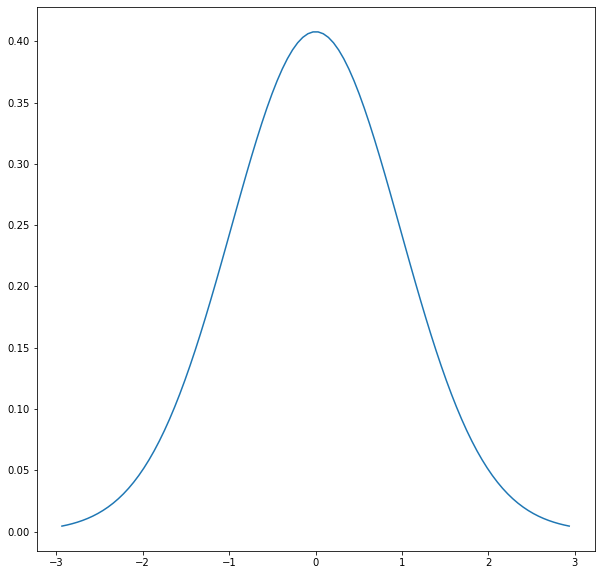

In [9]:
plt.figure(figsize = (10,10))
prediction_mu = df_2.x.mean()
prediction_sigma = df_2.x.std()
x_dom = np.linspace(prediction_mu - 3*prediction_sigma, prediction_mu + 3*prediction_sigma, 100)
MLE_dist = plt.plot(x_dom, stats.norm.pdf(x_dom, prediction_mu, prediction_sigma), label = "MLE Distribution")

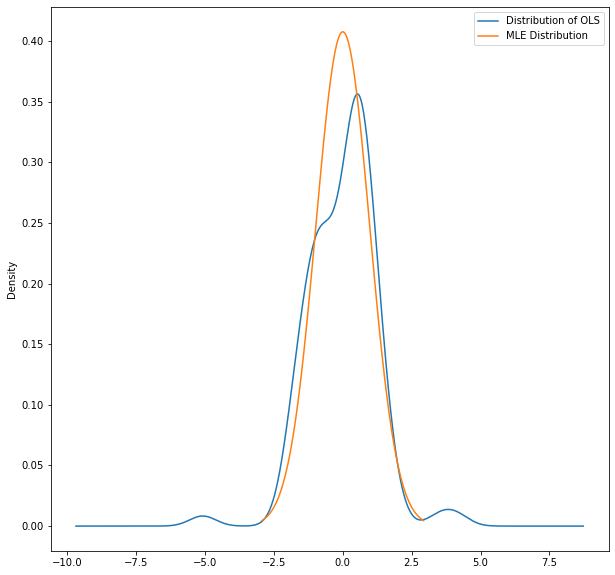

In [11]:
# Combine OLS and MLE
plt.figure(figsize = (10,10))

OLS_dist = error.plot.kde(label = "Distribution of OLS")
MLE_dist = plt.plot(x_dom, stats.norm.pdf(x_dom, prediction_mu, prediction_sigma), label = "MLE Distribution")
plt.legend()

MLE gives the same result as OLS.

# Question 3

In [12]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

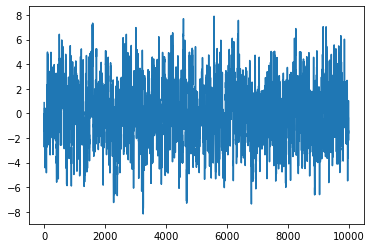

In [25]:
#AR(1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_1 = ArmaProcess(ar1, ma1)
simulate_1 = AR_1.generate_sample(nsample=10000)
plt.plot(simulate_1)

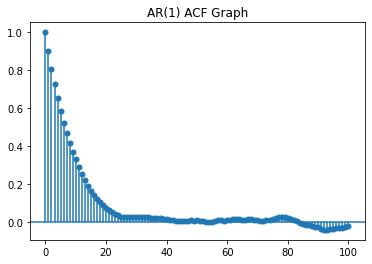

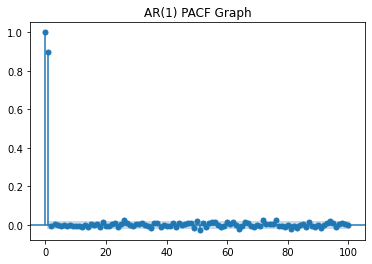

In [26]:
# Under AR(1), compare ACF and PACF graph.
plot_acf(simulate_1, alpha=1, lags=100)
plt.title("AR(1) ACF Graph")
plt.show()
plot_pacf(simulate_1, lags=100)
plt.title("AR(1) PACF Graph")
plt.show()

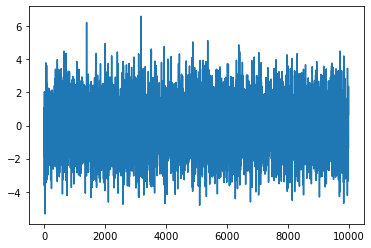

In [27]:
#AR(2)
ar2 = np.array([1, -0.9, 0.5])
ma2 = np.array([1])
AR_2 = ArmaProcess(ar2, ma2)
simulate_2 = AR_2.generate_sample(nsample=10000)
plt.plot(simulate_2)

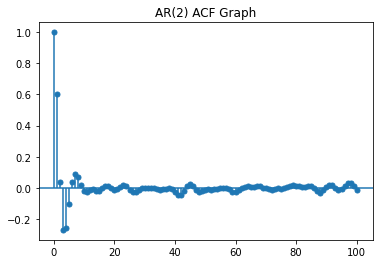

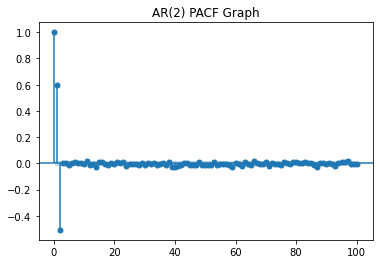

In [28]:
# Under AR(2), compare ACF and PACF graph.
plot_acf(simulate_2, alpha=1, lags=100)
plt.title("AR(2) ACF Graph")
plt.show()
plot_pacf(simulate_2, lags=100)
plt.title("AR(2) PACF Graph")
plt.show()

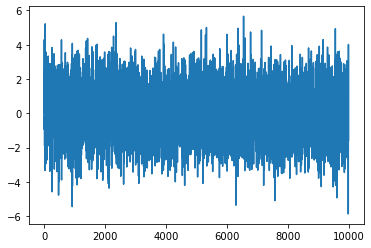

In [29]:
#AR(3)
ar3 = np.array([1, -0.9, 0.5,0])
ma3 = np.array([1])
AR_3 = ArmaProcess(ar3, ma3)
simulate_3 = AR_3.generate_sample(nsample=10000)
plt.plot(simulate_3)

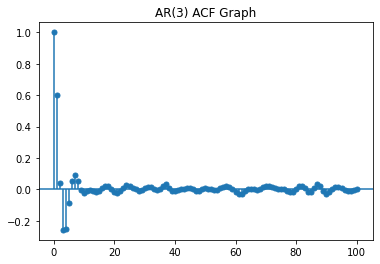

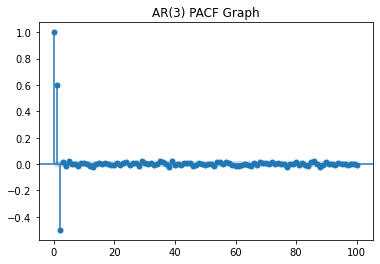

In [30]:
# Under AR(3), compare ACF and PACF graph.
plot_acf(simulate_3, alpha=1, lags=100)
plt.title("AR(3) ACF Graph")
plt.show()
plot_pacf(simulate_3, lags=100)
plt.title("AR(3) PACF Graph")
plt.show()

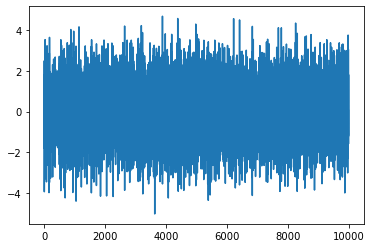

In [31]:
#MA(1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_1 = ArmaProcess(ar1, ma1)
simulate_ma_1 = MA_1.generate_sample(nsample=10000)
plt.plot(simulate_ma_1)

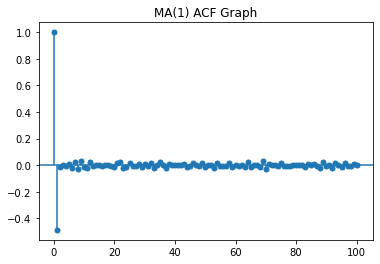

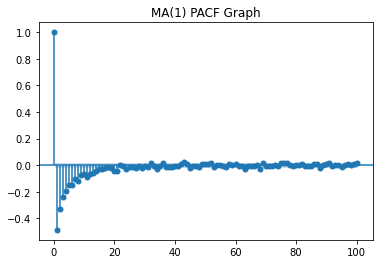

In [32]:
# Under MA(1), compare ACF and PACF graph.
plot_acf(simulate_ma_1, alpha=1, lags=100)
plt.title("MA(1) ACF Graph")
plt.show()
plot_pacf(simulate_ma_1, lags=100)
plt.title("MA(1) PACF Graph")
plt.show()

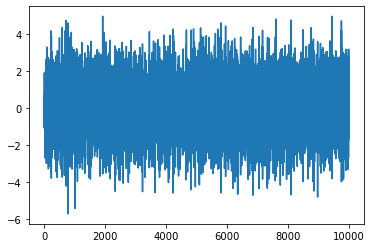

In [35]:
#MA(2)
ar2 = np.array([1])
ma2 = np.array([1, -0.9, 0.5])
MA_2 = ArmaProcess(ar2, ma2)
simulate_ma_2 = MA_2.generate_sample(nsample=10000)
plt.plot(simulate_ma_2)

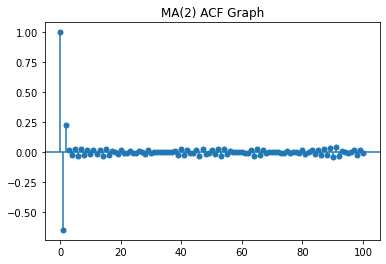

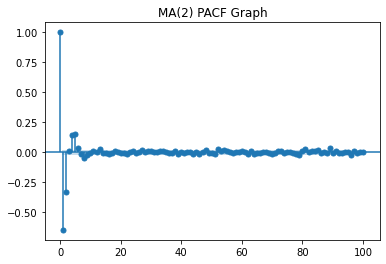

In [36]:
# Under MA(2), compare ACF and PACF graph.
plot_acf(simulate_ma_2, alpha=1, lags=100)
plt.title("MA(2) ACF Graph")
plt.show()
plot_pacf(simulate_ma_2, lags=100)
plt.title("MA(2) PACF Graph")
plt.show()

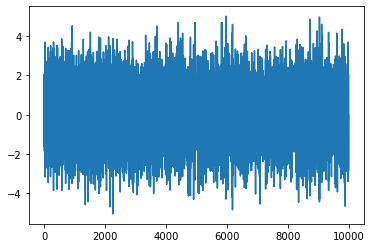

In [37]:
#MA(3)
ar3 = np.array([1])
ma3 = np.array([1, -0.9, 0.5, 0])
MA_3 = ArmaProcess(ar3, ma3)
simulate_ma_3 = MA_3.generate_sample(nsample=10000)
plt.plot(simulate_ma_3)

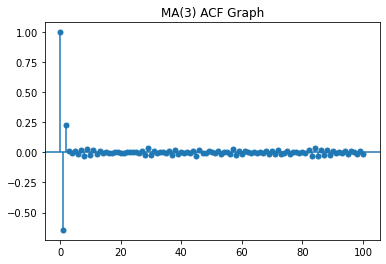

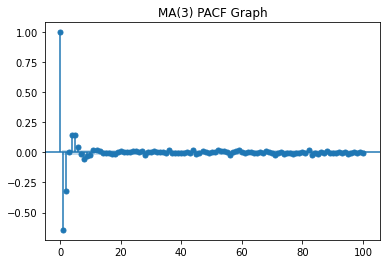

In [38]:
# Under MA(3), compare ACF and PACF graph.
plot_acf(simulate_ma_3, alpha=1, lags=100)
plt.title("MA(3) ACF Graph")
plt.show()
plot_pacf(simulate_ma_3, lags=100)
plt.title("MA(3) PACF Graph")
plt.show()